# Running Window diffusion coefficient

## Nocodazole Treatment

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tkinter import filedialog

In [2]:
mean_step_sizes_threshold = 0.25  # in pixels
R2_threshold = 0.6

In [3]:
# Use file dialog to select CSV files for each condition
csv_files_1 = filedialog.askopenfilenames(
    title="Select CSV Files for No drug_2x",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)
csv_files_2 = filedialog.askopenfilenames(
    title="Select CSV Files for Nocodazole_30 mins",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)
csv_files_3 = filedialog.askopenfilenames(
    title="Select CSV Files for Nocodazole_60 mins",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)

In [4]:
def load_and_label_files (file_paths, label):
    dfs = [pd.read_csv(file) for file in file_paths]
    for df in dfs:
        df['Condition'] = label
        df['logD'] = np.log10(df['D'])
        df = df [df['R2'] > 0]
    return pd.concat(dfs)

In [5]:
# Load and label CSV files for each condition
df_condition1 = load_and_label_files(csv_files_1, '- Noco')
df_condition2 = load_and_label_files(csv_files_2, '+ Noco, 30 mins')
df_condition3 = load_and_label_files(csv_files_3, '+ Noco, 60 mins')

In [6]:
# Combine the data from all conditions
df_combined = pd.concat([df_condition1, df_condition2, df_condition3], ignore_index=True)

In [7]:
filtered_by_step_size = df_combined[df_combined['mean_step_sizes'] > mean_step_sizes_threshold]

In [8]:
final_filtered_df = filtered_by_step_size[filtered_by_step_size['R2'] > R2_threshold]

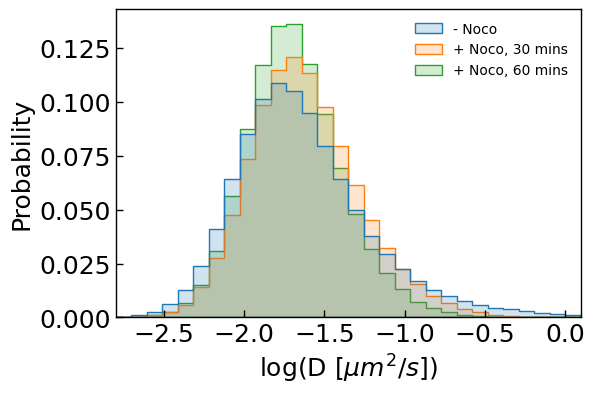

In [12]:
# Plot the probability distribution for each condition without KDE
plt.figure(figsize=(6, 4))
ax = sns.histplot(
    data=final_filtered_df,
    x='logD',
    hue='Condition',
    bins=30,
    binrange = (-2.8,0.1),
    stat="probability",
    element="step",
    common_norm=False,
    fill=True,
    alpha=0.2  
)

legend = ax.get_legend()
legend.set_title(None)
legend_frame = legend.get_frame()
legend_frame.set_visible(False)

plt.xlabel('log(D [$\mu m^2/s$])', fontsize = 18)
plt.ylabel('Probability', fontsize = 18)
plt.xlim(-2.8, 0.1) 
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)
plt.gca().tick_params(axis="both", which="major", labelsize=18)
plt.savefig("alpha_histo.png", format="png", bbox_inches="tight", dpi=300)

## LatrunculinA Treatment

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tkinter import filedialog

In [3]:
mean_step_sizes_threshold = 0.25  # in pixels
R2_threshold = 0.6

In [4]:
# Use file dialog to select CSV files for each condition
csv_files_1 = filedialog.askopenfilenames(
    title="Select CSV Files for No drug_2x",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)
csv_files_2 = filedialog.askopenfilenames(
    title="Select CSV Files for LatrunculinA_30 mins",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)
csv_files_3 = filedialog.askopenfilenames(
    title="Select CSV Files for LatrunculinA_60 mins",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)

In [5]:
def load_and_label_files (file_paths, label):
    dfs = [pd.read_csv(file) for file in file_paths]
    for df in dfs:
        df['Condition'] = label
        df['logD'] = np.log10(df['D'])
        df = df [df['R2'] > 0]
    return pd.concat(dfs)

In [6]:
# Load and label CSV files for each condition
df_condition1 = load_and_label_files(csv_files_1, '- LatA')
df_condition2 = load_and_label_files(csv_files_2, '+ LatA, 30 mins')
df_condition3 = load_and_label_files(csv_files_3, '+ LatA, 60 mins')

In [7]:
# Combine the data from all conditions
df_combined = pd.concat([df_condition1, df_condition2, df_condition3], ignore_index=True)

In [8]:
filtered_by_step_size = df_combined[df_combined['mean_step_sizes'] > mean_step_sizes_threshold]

In [9]:
final_filtered_df = filtered_by_step_size[filtered_by_step_size['R2'] > R2_threshold]

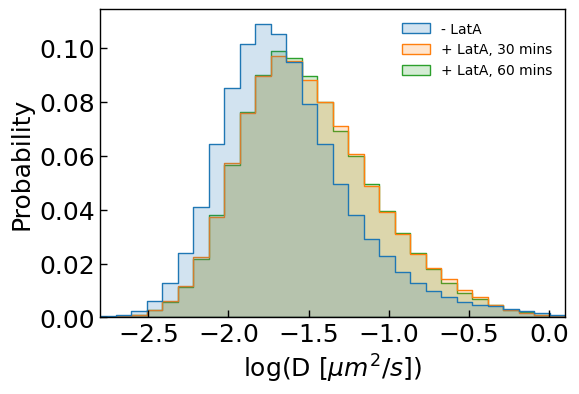

In [10]:
# Plot the probability distribution for each condition without KDE
plt.figure(figsize=(6, 4))
ax = sns.histplot(
    data=final_filtered_df,
    x='logD',
    hue='Condition',
    bins=30,
    binrange = (-2.8,0.1),
    stat="probability",
    element="step",
    common_norm=False,
    fill=True,
    alpha=0.2  
)

legend = ax.get_legend()
legend.set_title(None)
legend_frame = legend.get_frame()
legend_frame.set_visible(False)

plt.xlabel('log(D [$\mu m^2/s$])', fontsize = 18)
plt.ylabel('Probability', fontsize = 18)
plt.xlim(-2.8, 0.1) 
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)
plt.gca().tick_params(axis="both", which="major", labelsize=18)
plt.savefig("alpha_histo.png", format="png", bbox_inches="tight", dpi=300)